## Predicting Credit-Risk with Loan Default Analysis

### Purpose of this analysis
We will build a machine learning algorith for the prediction of loan defaulters based on certain variables present in the dataset. Our main goal is to correctly identifying defaulter's (True positives) so that we can decide whether a person is fit for sanctioning a loan or not in the future.

### Importing required libraries to process data

In [1]:
import os
os.getcwd()

'C:\\Users\\Manisha\\Desktop\\Capstone Projects'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data cleaning and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn: data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## Data Processing
### Load Data

In [4]:
df = pd.read_csv("XYZCorp_LendingData.txt", header=0, sep="\t", low_memory=False)

#### Getting the basic understanding of data

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969,855969,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,600221,NaN,NaN,247998,54958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,NaN,13.192320,436.238072,NaN,NaN,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,NaN,4.368365,243.726876,NaN,NaN,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,5.320000,15.690000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,NaN,9.990000,260.550000,NaN,NaN,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,NaN,12.990000,382.550000,NaN,NaN,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,NaN,15.990000,571.560000,NaN,NaN,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000


## Data Cleaning

### Check for null values in the data set 

In [8]:
 df.isna().mean().sort_values()

id                           0.000000
earliest_cr_line             0.000000
inq_last_6mths               0.000000
open_acc                     0.000000
pub_rec                      0.000000
                               ...   
mths_since_rcnt_il           0.984890
il_util                      0.986438
annual_inc_joint             0.999484
verification_status_joint    0.999484
dti_joint                    0.999486
Length: 73, dtype: float64

As you can see, there are a lot of columns which have lot of null values.So,these columns are not necessary for our analysis

1. Drop features with a cut-off  of their data missing.
2. Check for unique values
3. Select features which are relavent to the analysis.

In [9]:
# calculate the percentage of missing data for each feature:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data

dti_joint                    855529
verification_status_joint    855527
annual_inc_joint             855527
il_util                      844360
mths_since_rcnt_il           843035
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 73, dtype: int64

In [10]:
# Top 10 features missing the most data:
missing_data.head(10)

dti_joint                    855529
verification_status_joint    855527
annual_inc_joint             855527
il_util                      844360
mths_since_rcnt_il           843035
total_bal_il                 842681
inq_last_12m                 842681
open_acc_6m                  842681
open_il_6m                   842681
open_il_24m                  842681
dtype: int64

###  Let's visualize the distribution of missing data percentages

Text(0, 0.5, 'Count')

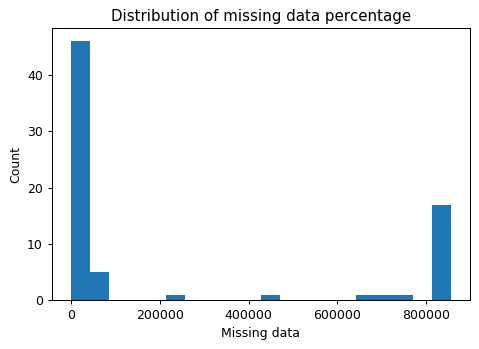

In [11]:
plt.figure(figsize=(6,4), dpi=90)
missing_data.plot.hist(bins=20)
plt.title('Distribution of missing data percentage')
plt.xlabel('Missing data')
plt.ylabel('Count')

###  1.We drop columns with more than 30% of missing values.

In [12]:
# Store all columns missing  more than 30% data in a list before drop
colnames= df.columns

for i in colnames:
    if (df[i].isnull().sum() > (0.3*len(df))):
        df = df.drop(i, axis=1)

In [13]:
print(df.shape)
df.head()

(855969, 52)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


### Imputing the null values

In [14]:
missing_data

dti_joint                    855529
verification_status_joint    855527
annual_inc_joint             855527
il_util                      844360
mths_since_rcnt_il           843035
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 73, dtype: int64

Using for loop impute

1.integer dtype values with mean and

2.object dtype values with mode

In [15]:
for col in df.columns:
    if df[col].isnull().sum() >0:
        if df[col].dtypes == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        if ((df[col].dtypes=="int64") or (df[col].dtypes=="float64")):
            df[col].fillna(int(df[col].mean()), inplace=True)

In [16]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prnc

#### 2.Checking for the unique values if any present in the data set 

In [17]:
for i in df.columns:
    unique_values = df[i].unique()
    print({i: unique_values})

{'id': array([ 1077501,  1077430,  1077175, ..., 36271333, 36490806, 36271262],
      dtype=int64)}
{'member_id': array([ 1296599,  1314167,  1313524, ..., 38982739, 39222577, 38982659],
      dtype=int64)}
{'loan_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt': array([ 5000.,  2500.,  2400., ..., 32825., 32575., 34175.])}
{'funded_amnt_inv': array([ 4975.,  2500.,  2400., ..., 33625., 34125., 30525.])}
{'term': array([' 36 months', ' 60 months'], dtype=object)}
{'int_rate': array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 2

{'dti': array([27.65,  1.  ,  8.72, ..., 45.77, 55.1 , 59.19])}
{'delinq_2yrs': array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 15., 10.,
       12., 17., 18., 13., 29., 24., 14., 22., 19., 16., 21., 30., 26.,
       20., 27., 39.])}
{'earliest_cr_line': array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1

{'revol_util': array([ 83.7,   9.4,  98.5, ..., 123.3, 121.4, 184.6])}
{'total_acc': array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2., 105.,  83.,  84.,  98.,  88.,  82.,
        91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,  85., 156.,
        89., 106.,  97., 119., 124., 100.,  94., 121., 102., 117., 116.,
       118., 111., 127., 112., 125., 110., 109., 135., 104., 151., 130.,
       107., 113., 169., 140., 146., 129., 126., 137., 103., 138., 162.,
       114., 108.])}
{'initial_list_sta

In [18]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [19]:
df['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [20]:
df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'new kitchen for momma!',
       'New Baby and New House (CC Consolidate)',
       'Credit Card/Auto Repair'], dtype=object)

In [21]:
df['emp_title'].unique()

array(['Teacher', 'Ryder', 'AIR RESOURCES BOARD', ...,
       'machining Cell Lead', 'KYC Business Analyst',
       'Manager Hotel Operations Oasis '], dtype=object)

In [22]:
df.drop(["sub_grade","title","zip_code","emp_title"], axis=1, inplace = True)
print(df.shape)

(855969, 48)


In [23]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.0,139766.0,32163.0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,...,Feb-2016,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,225.0,139766.0,32163.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.0,139766.0,32163.0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,...,Feb-2016,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,225.0,139766.0,32163.0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,...,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.0,139766.0,32163.0,0


###  3.Feature Selection

#### Select columns which are necessary for further analysis

In [24]:
print(sorted(df.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'default_ind', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'member_id', 'next_pymnt_d', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'term', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'verification_status']


#### Finding correlation between variables

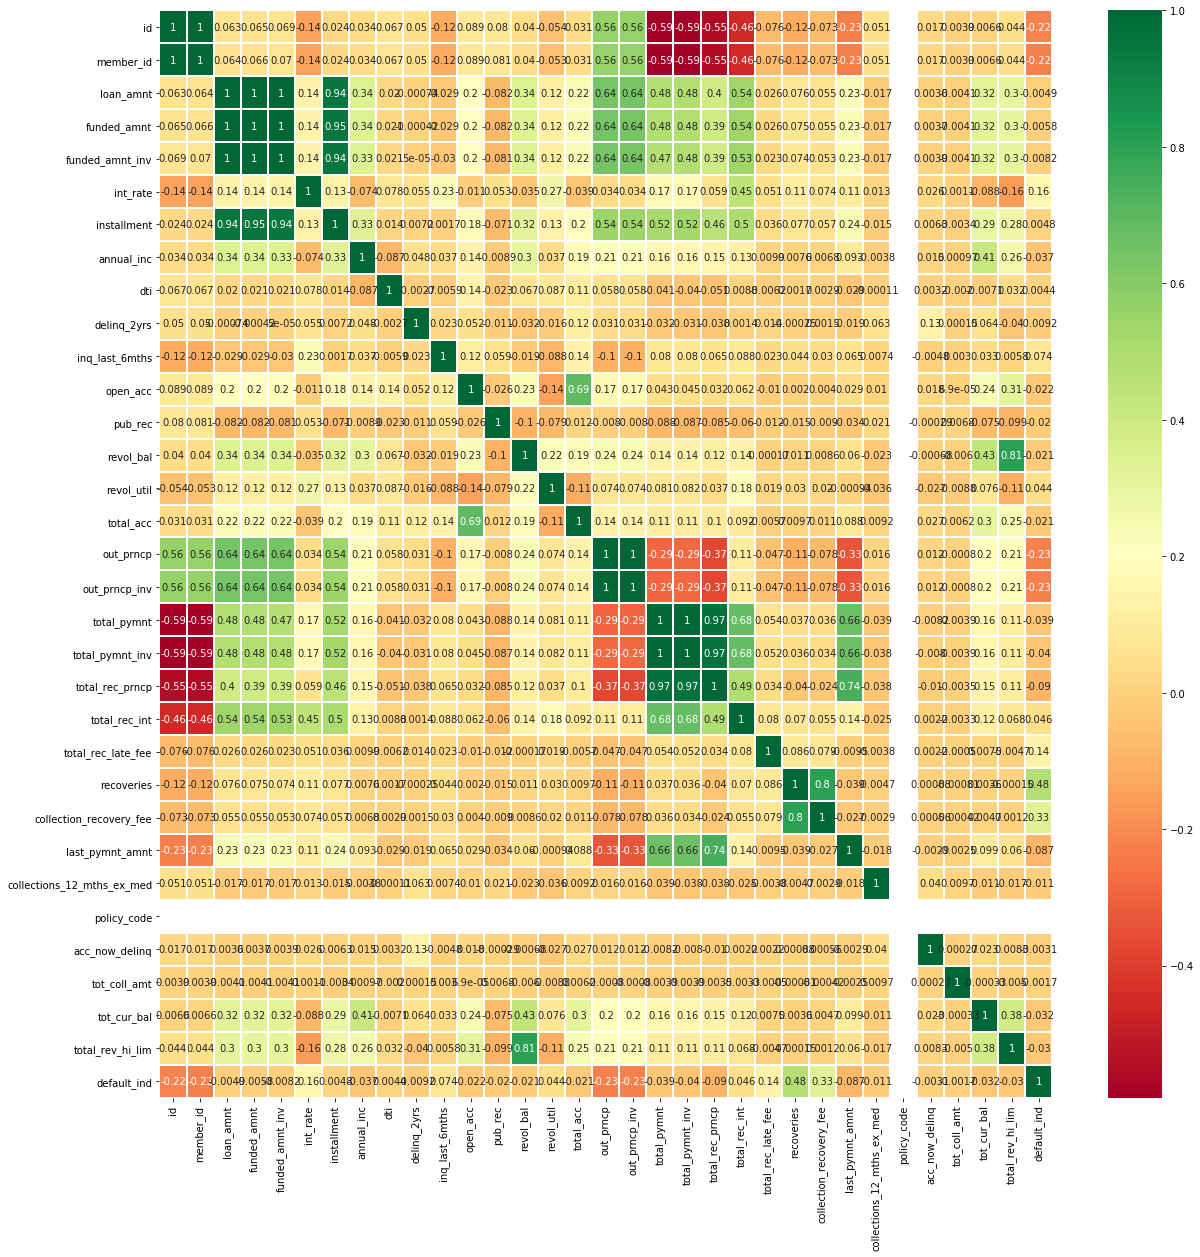

In [25]:
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

#### Remove highly correlated features

In [26]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.97
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]

to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

In [27]:
df_copy =df

In [28]:
#Removing the variables as they are highly correlated 
df.drop(["funded_amnt","funded_amnt_inv"],axis=1, inplace= True)


In [29]:
df.shape

(855969, 46)

##  Data Transformation

### Label Encoding

Since we have some categorical variables for the analysis and the machne learning algorithms doesn't take categorical and string variables directly. 

Our algorithm requires the data in numeric format to make the object variale in numeric format we need to convert it using some label encoding techiques.

This can be done using one of the different available techniques which are one hot encoder, get dummies and Label encoder


In [30]:
df.issue_d= pd.to_datetime(df.issue_d)

In [31]:
# determine categorical and numerical columns
object_colname= []
for i in df.columns:
    if df[i].dtypes=="object":
        object_colname.append(i)

object_colname

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [32]:
# define the transformation methods for the columns
le= LabelEncoder()

for i in object_colname:
    df[i]=le.fit_transform(df[i])

df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,0,10.65,162.87,1,1,5,24000.0,...,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
1,1077430,1314167,2500.0,1,15.27,59.83,2,10,5,30000.0,...,0,99,0.0,1.0,0,0.0,225.0,139766.0,32163.0,1
2,1077175,1313524,2400.0,0,15.96,84.33,2,1,5,12252.0,...,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
3,1076863,1277178,10000.0,0,13.49,339.31,2,1,5,49200.0,...,0,40,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0
4,1075358,1311748,3000.0,1,12.69,67.79,1,0,5,80000.0,...,0,41,0.0,1.0,0,0.0,225.0,139766.0,32163.0,0


### Split the dataset into training and testing data

we have splited the data in training and testing data set using the issue_d (Issue date) variiable.

- (June 2007 - May 2015) as train_data

- (June 2015 - Dec 2015) as test_data



In [33]:
train_data= df[(df.issue_d<"Jun-2015")]
train_data.shape

(598978, 46)

In [34]:
train_data.issue_d.unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [35]:
test_data= df[(df.issue_d>"May-2015")]
test_data.shape

(256991, 46)

In [36]:
test_data.issue_d.unique()

array(['2015-12-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
test_data.drop("issue_d", axis=1, inplace=True)
train_data.drop("issue_d", axis=1, inplace= True)

In [38]:
print(train_data.shape)
print(test_data.shape)

(598978, 45)
(256991, 45)


#### create dependent and independent features using train and test data

In [39]:
X_train= train_data.values[: ,2:-1]
y_train= train_data.values[:,-1]
X_test= test_data.values[:,2:-1]
y_test= test_data.values[:,-1]

In [40]:
print(X_train.shape)
print(X_test.shape)

(598978, 42)
(256991, 42)


###  Data Scaling

As our data sets different variable have different properties and it varies widely to Minimise this problem we need to do feature scaling on our data set which will in retunr make our data set uniform.

For Machine Learing purpose this step is important as it calculates distance between the data. 

In [41]:
scaler= StandardScaler()

#fitting the scaler object with training data

scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)
print(X_train)

[[-1.14444640e+00 -6.34014251e-01 -6.56815116e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 [-1.44433354e+00  1.57725161e+00  4.00161631e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 [-1.45632902e+00 -6.34014251e-01  5.58021795e-01 ...  1.19380084e-03
   4.78952685e-03  2.72499521e-02]
 ...
 [-1.84807551e-01  1.57725161e+00  5.64885280e-01 ... -1.76339950e-02
  -7.29852933e-01 -3.85911693e-01]
 [-3.04762407e-01  1.57725161e+00  1.48001666e+00 ... -1.76339950e-02
  -5.61199930e-01 -1.23364577e-01]
 [ 6.54876440e-01 -6.34014251e-01 -3.50246103e-01 ... -1.76339950e-02
  -7.35913030e-01  3.05462380e-01]]


In [42]:
print(X_test)

[[ 1.25465072 -0.63401425 -1.87622768 ... -0.017634    2.03008666
   0.41631561]
 [ 0.41496673  1.57725161  1.36333741 ... -0.01261325 -0.71545759
   0.09542469]
 [-0.90453669 -0.63401425 -1.37976891 ... -0.017634   -0.58343652
   0.34922023]
 ...
 [ 1.25465072 -0.63401425  0.69300367 ... -0.017634    2.21050502
   0.5359204 ]
 [ 1.25465072 -0.63401425 -1.56508301 ... -0.017634    0.19531037
   0.36672337]
 [ 1.21566539  1.57725161 -1.22190875 ... -0.017634    0.20867598
   2.09369996]]


##  Model Building 

We will train several machine learning models for the training set and evaluate their performance on both training and testing set. 

Before doing this, let's first go through a standard procedure of training a certain classifier.

The followings are ML models functions:

    'LogisticRegression()'
    'KNeighborsClassifier()'
    'DecisionTreeClassifier()'
    'RandomForestClassifier()'
    'SupportVectorClassifier()'
    'XGBClassifier()'


#### For classification convert target variables to integer type 

In [43]:
#convert  Y_train & Y_test as integer type
y_train=y_train.astype(int)
y_test= y_test.astype(int)

### Classification Report

In [44]:
def get_classification_report(y_test,predictions,average="macro"):
    #Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    
    return acc,pre,rec

### Classification_ROC

In [45]:
def get_classification_ROC(X,y,model,test_size,model_fitted=False,random_state=0):
    
    def check_fitted(clf): 
        return hasattr(clf, "classes_")
    
    if(len(np.unique(y)) == 2):
        #Binary Classifier
        if not check_fitted(model):
            model = model.fit(X,y)
        
        plot_roc_curve(model, X, y)
        y_score = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        return auc
# print("False Positive Rate: {} \nTrue Positive Rate: {} \nThreshold:{}".format(fpr,tpr,threshold))
    
    else:
        #Multiclass Classifier
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # shuffle and split training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)

        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(model)
        model_fitted = classifier.fit(X_train, y_train)
        try:
            y_score = model_fitted.decision_function(X_test)
        except:
            y_score = model_fitted.predict_proba(X_test)



        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic averaged')
        plt.legend(loc="lower right")
        plt.show()



        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(10,10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-class ROC (One vs All)')
        plt.legend(loc="lower right")
        plt.show()

### Logistic Regression

#### Create model

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict

In [47]:
y_pred = logreg.predict(X_test)

#### Results

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    256680
           1      0.703     0.791     0.744       311

    accuracy                          0.999    256991
   macro avg      0.851     0.895     0.872    256991
weighted avg      0.999     0.999     0.999    256991

Overall accuracy: 0.9993423894221977
Overall Precision: 0.851301935388344
Overall Recall: 0.8952958054043545


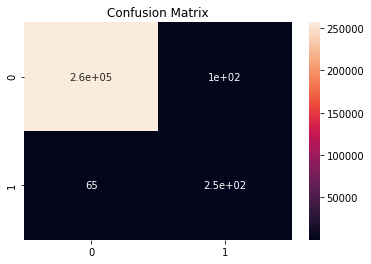

In [48]:
acc_LR,pre_LR,rec_LR = get_classification_report(y_test,y_pred)

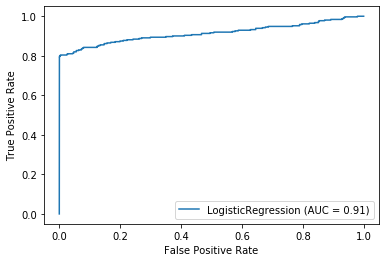

In [49]:
auc_LR = get_classification_ROC(X_test,y_test,logreg,test_size=0.3,random_state=0)

### KNN

In [50]:
#knn = KNeighborsClassifier(n_neighbors = 3)
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
#acc_LR,pre_LR,rec_LR = get_classification_report(y_test,y_pred)

In [51]:
# Kernel got engaged for KNN Classifier

### Random Forest

#### Create model

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predict

In [53]:
y_pred = random_forest.predict(X_test)

#### Results

              precision    recall  f1-score   support

           0      1.000     0.794     0.885    256680
           1      0.006     0.997     0.012       311

    accuracy                          0.794    256991
   macro avg      0.503     0.895     0.448    256991
weighted avg      0.999     0.794     0.884    256991

Overall accuracy: 0.7943352101824578
Overall Precision: 0.5029131085261306
Overall Recall: 0.8954372416616434


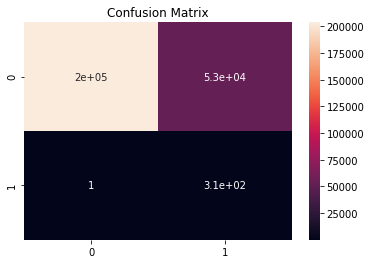

In [54]:
acc_RF,pre_RF,rec_RF = get_classification_report(y_test,y_pred)

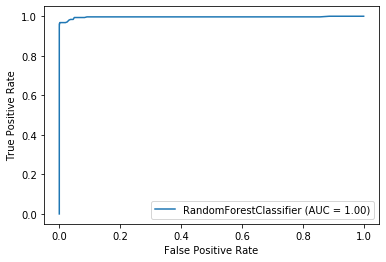

In [55]:
auc_RF = get_classification_ROC(X_test,y_test,random_forest,test_size=0.3,random_state=0)

## Decision Tree

#### Create model

In [56]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Predict

In [57]:
y_pred = decision_tree.predict(X_test)

#### Results

              precision    recall  f1-score   support

           0      1.000     0.977     0.988    256680
           1      0.048     0.971     0.092       311

    accuracy                          0.977    256991
   macro avg      0.524     0.974     0.540    256991
weighted avg      0.999     0.977     0.987    256991

Overall accuracy: 0.9768007439949259
Overall Precision: 0.5241227402864894
Overall Recall: 0.9739343957744877


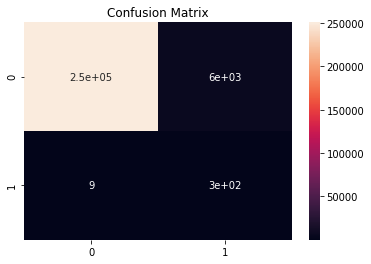

In [58]:
acc_DT,pre_DT,rec_DT = get_classification_report(y_test,y_pred)

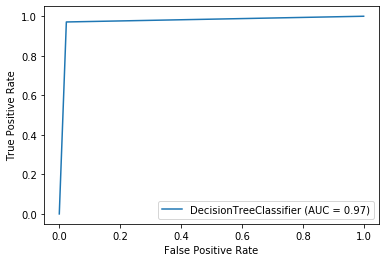

In [59]:
auc_DT = get_classification_ROC(X_test,y_test,decision_tree,test_size=0.3,random_state=0)

### Support vector Classifier

In [60]:
#svc_model = SVC()
#svc_model.fit(X_train, y_train)

#y_pred = svc_model.predict(X_test)

#acc_svc,pre_scv,rec_svc = get_classification_report(y_test,y_pred)

In [61]:
# Kernel got engaged for SVC

### XGBClassifier

#### Create model

In [62]:
model_xgb=XGBClassifier(random_state=10)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Predict

In [63]:
y_pred=model_xgb.predict(X_test)

#### Results

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    256680
           1      1.000     0.968     0.984       311

    accuracy                          1.000    256991
   macro avg      1.000     0.984     0.992    256991
weighted avg      1.000     1.000     1.000    256991

Overall accuracy: 0.999961088131491
Overall Precision: 0.9999805212513149
Overall Recall: 0.9839228295819935


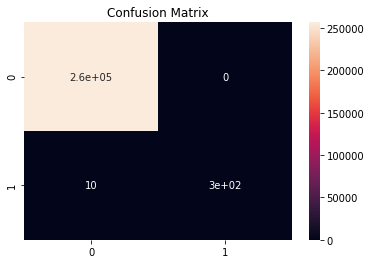

In [64]:
acc_xgb,pre_xgb,rec_xgb = get_classification_report(y_test,y_pred)

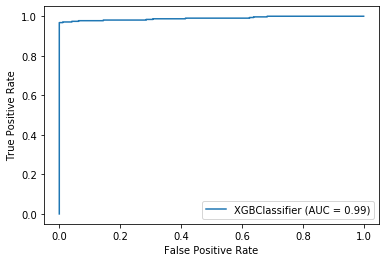

In [65]:
auc_XG = get_classification_ROC(X_test,y_test,model_xgb,test_size=0.3,random_state=0)

## Model Comparision

In [67]:
result = pd.DataFrame(
    [["LogisticRegression",auc_LR,acc_LR,pre_LR,rec_LR],
    ["DecisionTree",auc_DT,acc_DT,pre_DT,rec_DT],
    ["XGBClassifier",auc_XG,acc_DT,pre_DT,rec_DT],
    ["RandomForest",auc_RF,acc_RF,pre_RF,rec_RF]],
    columns=["Classifier","AUC","Accuracy","Precision","Recall"]
)

result

,Classifier,AUC,Accuracy,Precision,Recall
0,LogisticRegression,0.914042,0.999342,0.851302,0.895296
1,DecisionTree,0.973934,0.976801,0.524123,0.973934
2,XGBClassifier,0.989663,0.976801,0.524123,0.973934
3,RandomForest,0.995986,0.794335,0.502913,0.895437


### AUC Comparision

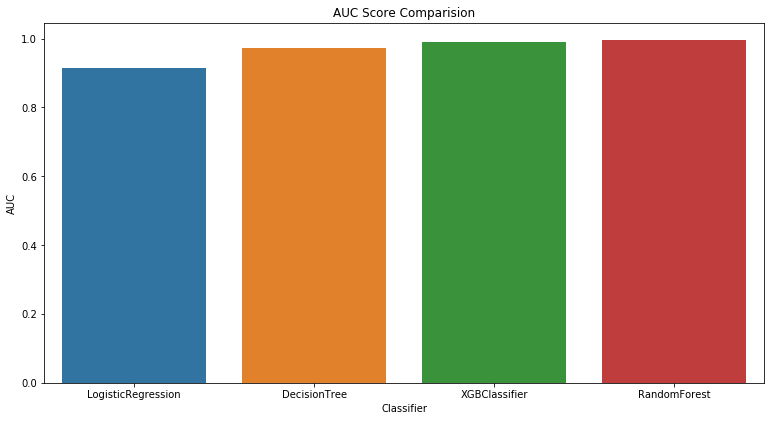

In [68]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = result.Classifier
y = result.AUC
sns.barplot(x=x, y=y)
plt.title("AUC Score Comparision")
plt.show()

### Accuracy comparision

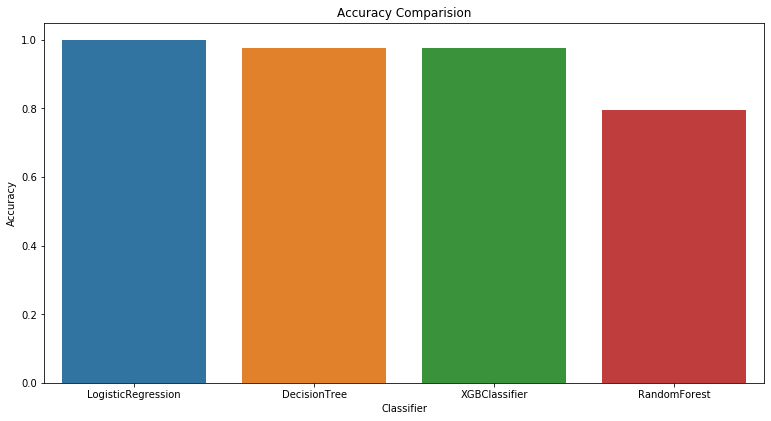

In [69]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = result.Classifier
y = result.Accuracy
sns.barplot(x=x, y=y)
plt.title("Accuracy Comparision")
plt.show()

### Precision comparision

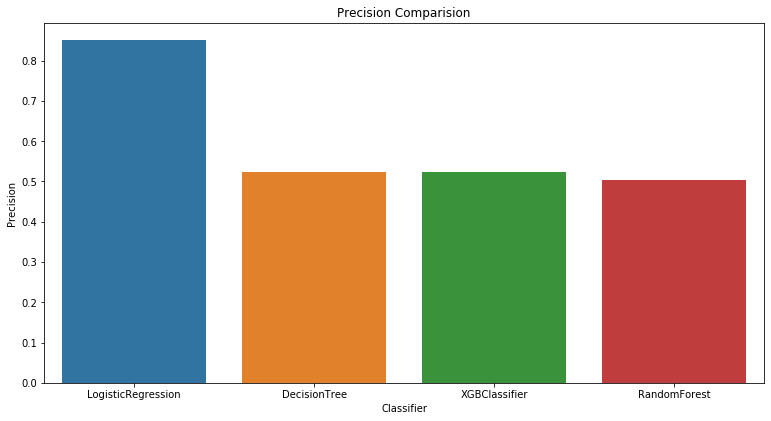

In [70]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
x = result.Classifier
y = result.Precision
sns.barplot(x=x, y=y)
plt.title("Precision Comparision")
plt.show()